Found 2152 files belonging to 3 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,688,963 (98.00 MB)

 Trainable params: 2,101,251 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 842ms/step - accuracy: 0.7487 - loss: 0.6234 - val_accuracy: 0.9810 - val_loss: 0.1001
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 796ms/step - accuracy: 0.9673 - loss: 0.1109 - val_accuracy: 0.9905 - val_loss: 0.0627
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 46s 802ms/step - accuracy: 0.9804 - loss: 0.0678 - val_accuracy: 0.9810 - val_loss: 0.0598
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 787ms/step - accuracy: 0.9899 - loss: 0.0503 - val_accuracy: 0.9952 - val_loss: 0.0394
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 46s 805ms/step - accuracy: 0.9939 - loss: 0.0360 - val_accuracy: 0.9905 - val_loss: 0.0393
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 46s 803ms/step - accuracy: 0.9938 - loss: 0.0283 - val_accuracy: 0.9952 - val_loss: 0.0315
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 46s 813ms/step - accuracy: 0.9950 - loss: 0.0255 - val_accuracy: 0.9952 - val_loss: 0.0315
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 799ms/step - accuracy: 0.9954 - loss: 0.0238 - val_accu

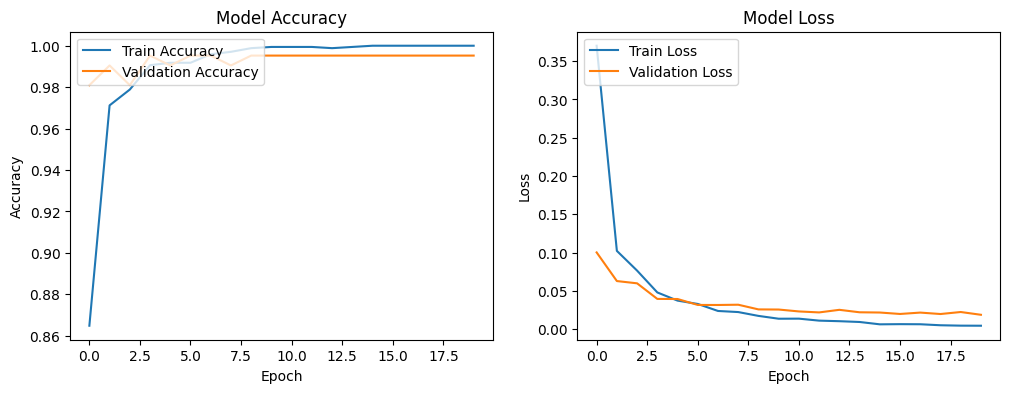

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np

IMG_SIZE =224
BATCH_SIZE=30

dataset = keras.utils.image_dataset_from_directory(
    directory=r'D:\Plnat disease\PlantVillage',
    shuffle=True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)


class_names = dataset.class_names
class_names

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=5)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)
len(val_ds)
len(test_ds)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

IMG_SIZE = 224
CHANNELS = 3
n_classes = 3

resize = layers.Resizing(IMG_SIZE,IMG_SIZE)
rescale = layers.Rescaling(1.0/255)
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1)
]) 

input_shape = (224, 224, 3)
num_classes = 3

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  

n_classes = len(class_names) 

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
])
model.summary()

learning_rate = 0.0001 
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    epochs=20,
    verbose=1,
    validation_data=val_ds
)

score =model.evaluate(test_ds)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()